# Setup

## Find File Name

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import re
import functools
import spatialdata
import spatialdata_plot
import spatialdata_io as sdio
import numpy as np
import pandas as pd
import corescpy as cr

# File Paths
libid = "1014A2"
panel_id = "XR4UZH"
# libid = "50336C"
# panel_id = "TUQ97N"
ddd = "/mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library"
dir_data = F"/mnt/cho_lab/bb-xenium-registry/outputs/{panel_id}"  # data
out_dir = os.path.join(ddd, f"outputs/{panel_id}/nebraska")  # to save outputs
file_mdf = os.path.join(ddd, f"samples_{panel_id}.csv")  # metadata
files = functools.reduce(lambda i, j: i + j, [[os.path.join(
    run, i) for i in os.listdir(os.path.join(
        dir_data, run))] for run in os.listdir(dir_data)])  # all data paths

# Images (Optional)
image_type = "he"
dir_image = str("/mnt/cho_lab/bb-nfs-data-registries/tissue-registry/"
                f"xenium/{panel_id}/{image_type}")

# Find File Path & Condition-ID String
  # Find Data Path Automatically
m_d = cr.pp.get_metadata_cho(
      dir_data, file_mdf, samples=libid, path_col_only=True,
      panel_id=panel_id, capitalize_sample=panel_id == "TUQ97N")  # metadata
dir_oba = m_d.iloc[0]  # data path
lib = m_d.index.values[0]  # newly-constructed sample ID
print(lib, "\n", dir_oba)
file_image = os.path.join(dir_image, f"ome-tiff/{lib}.ome.tif")
file_align = os.path.join(dir_image, f"alignment/{lib}/matrix.csv")  # align

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
metCRC-1014A2 
 /mnt/cho_lab/bb-xenium-registry/outputs/XR4UZH/CHO-014/output-XETG00189__0033935__1014A2-XR4UZH-JH__20240617__193846


## Load Data

Load the spatial data. Optionally, update it with the processed object.

Optionally, add aligned image data (e.g., H&E, IF). 
* Image data should have been converted to OME-TIFF (e.g., from NDPI) by the dry lab. 
* The OME-TIFF then would have been loaded into Xenium Explorer, where image alignment would be performed and the alignment files downloaded (instructions on [Confluence](https://mssm-ipm.atlassian.net/wiki/x/BQA1bg); see also [10x](https://www.10xgenomics.com/support/software/xenium-explorer/latest/tutorials/xe-image-alignment)). 
* The OME-TIFF and alignment files should be transferred to the image registry NFS, which is mounted on different compute environments and [can be mounted locally](https://mssm-ipm.atlassian.net/wiki/spaces/cholab/pages/857047077/Compute#Network-File-System---NFS).

In [ ]:
self = cr.Spatial(dir_oba, library_id=lib)  # data
if os.path.exists(os.path.join(out_dir, f"{lib}.h5ad")):  # processed object?
    self.update_from_h5ad(os.path.join(out_dir, f"{lib}.h5ad"))
self.get_layer("counts", inplace=True)  # start with integer counts data
if os.path.exists(file_image) and os.path.exists(file_align):  # image?
    self.add_image(file_image, name=image_type, file_align=file_align)
self.adata

## Set Default Cell Type Label Column

This process allows you not to have to manually specify the `col_cell_type` arguments in downstream methods.

You also could have done this part originally above where you loaded the object with `cr.Spatial()` (e.g., `cr.Spatial(os.path.join(dir_data, file_path), col_cell_type="lump_res1pt5_dist0_npc30", library_id=lib)`).

You can always change it later just like in the cell below if you want to change the default going forward.

If you want to change it just for one method/function call, just specify the `col_cell_type` argument (e.g., if `self._columns["col_cell_type"]` is "lump_res1pt5_dist0_npc30" and you want to plot the Leiden clusters, run `self.plot_spatial(col_cell_type="leiden_res1pt5_dist0_npc30")` instead of just `self.plot_spatial()`).

In [ ]:
self._columns["col_cell_type"] = "lump_res1pt5_dist0_npc30"

# Plot

## Plot Morphology

In [ ]:
self.plot_image([image_type, "morphology_focus"])

## Plot Clusters

You can plot just one group out of the clusters by specifying some label that exists within the cell type label column in `self.rna.obs`.

In [ ]:
self.plot_umap(color="leiden_res1pt5_dist0_npc30")  # UMAP
fig_clusters = self.plot_spatial()  # spatially-resolved plot of clusters
fig_myeloid = self.plot_spatial(groups=["Myeloid"])  # plot of JUST 1 cluster

## Plot Gene Expression

You can plot gene expression within the tissue (spatially-resolved) by specifying a gene name.

In [ ]:
for x in ["PLAUR", "PTGER4", "PDGFRA", "IL6", "IL6ST", "IL10", "TGFB1"]:
    fig_gex = self.plot_spatial(color=x, figsize=(15, 15))

# Analyze

## Quantify (Co-)Expression Percentages

In [ ]:
self.quantify_cells()

# Workspace

In [9]:
self = cr.Spatial(dir_oba, library_id=lib)  # data
self.update_from_h5ad(os.path.join("/mnt/cho_lab/disk2/jiayuzh/data/shared-xenium-library/outputs/XR4UZH/nebraska", f"{lib}.h5ad"))



<<< INITIALIZING SPATIAL CLASS OBJECT >>>

INFO     reading                                                                                                   
         /mnt/cho_lab/bb-xenium-registry/outputs/XR4UZH/CHO-014/output-XETG00189__0033935__1014A2-XR4UZH-JH__202406
         17__193846/cell_feature_matrix.h5                                                                         


Counts: Initial: table


	Observations: 755401

	Genes: 480







 AnnData object with n_obs × n_vars = 755401 × 480
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial'
    obsm: 'spatial'
    layers: 'counts' 

                  gene_ids    feature_types   genome
ACKR1     ENSG00000213088  Gene Expression  U



<<< INITIALIZING OMICS CLASS OBJECT >>>





col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id=None
col_batch=None
col_subject=None
col_condition=None
col_num_umis=None








key_control=None
key_treatment=None
key_table=None






<<< LOADING FILE /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/XR4UZH/nebraska/objects_scrna/metCRC-1014A2_scrna.h5ad with sc.read() >>>


Counts: Initial


	Observations: 915

	Genes: 18082

     log1p_mean_counts  mean_counts  n_cells_by_counts  pct_dropout_by_counts  \
25%           0.001919     0.001921                2.0              92.795389   
50%           0.027477     0.027858               25.0              97.598463   
75%           0.084687     0.088377               75.0              99.807877   

     total_counts  log1p_total_counts     means  dispersions  \
25%           2.0            1.098612  0.009758     2.329369   
50%          29.0            3.401197  0.150632     2.483464   
75%          92.0 

439 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
439 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
Allocate tensors for mapping.
Begin training with 439 genes and None density_prior in cells mode...
Printing scores every 100 epochs.


Score: 0.200
Score: 0.595
Score: 0.642
Score: 0.660
Score: 0.670
Score: 0.676
Score: 0.681
Score: 0.684
Score: 0.687
Score: 0.690


Saving results..
spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/corescpy/corescpy/processing/spatial_pp.py", line 485, in impute_spatial
    figs = plot_integration_spatial(
  File "/home/elizabeth/elizabeth/corescpy/corescpy/visualization/spatial_plots.py", line 149, in plot_integration_spatial
    figs["auc"] = plot_auc_spatial_integration(
  File "/home/elizabeth/elizabeth/corescpy/corescpy/visualization/spatial_plots.py", line 180, in plot_auc_spatial_integration
    metric_dict, ((pol_xs, pol_ys), (x_s, y_s)) = tg.utils.eval_metric(
  File "/home/elizabeth/elizabeth/miniconda3/envs/bio/lib/python3.10/site-packages/tangram/utils.py", line 717, in eval_metric
    pol_cs = np.polyfit(xs, ys, pol_deg)  # polynomial coefficients
  File "<__array_function__ internals>", line 200, in polyfit
  File "/home/elizabeth/elizabeth/miniconda3/envs/bio/lib/python3.10/site-packages/numpy/lib/polynomial.py", line 638, in polyfit
    raise TypeError("expected non-empty vector for x")
TypeError

(AnnData object with n_obs × n_vars = 652407 × 14450
     obs: 'Sample', 'age', 'cca_or_hcc', 'cell_area', 'cell_id', 'cell_labels', 'clinical_block', 'control_codeword_counts', 'control_probe_counts', 'deprecated_codeword_counts', 'description', 'diagnosis', 'disease_status', 'file_path', 'grid', 'hispanic', 'ibd_diag_year', 'ibd_status', 'inflamed', 'location', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'n_obs_raw', 'nucleus_area', 'nucleus_count', 'out_file', 'procedure', 'project', 'project_owner_id', 'psc_diag_year', 'psc_stage', 'race', 'region', 'sampleID', 'sex', 'slide_ID', 'sourceID', 'total_counts', 'transcript_counts', 'unassigned_codeword_counts', 'vital_status', 'z_level', 'n_counts', 'outlier_n_counts_threshold', 'outlier', 'assay_protein', 'col_gene_symbols', 'col_cell_type', 'col_sample_id', 'col_batch', 'col_subject', 'col_condition', 'col_num_umis', 'col_segment', 'cell_filter_ngene', 'gene_filter_ncell', 'gene_filt

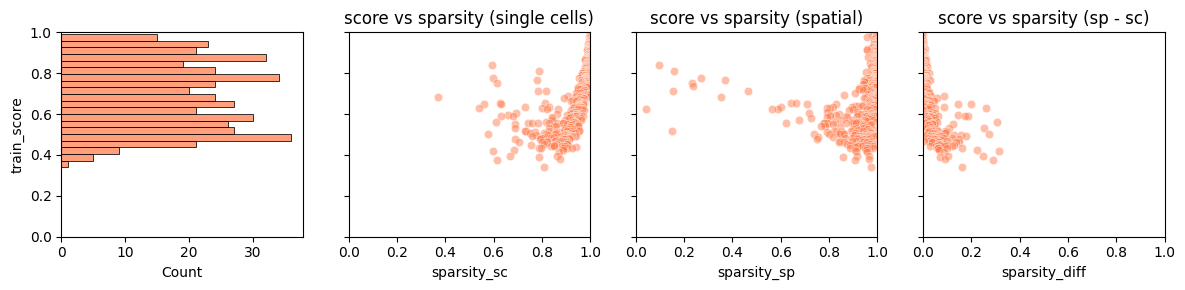

In [10]:
whole_tx = cr.Omics(
    os.path.join(out_dir, f"objects_scrna/{self._library_id}_scrna.h5ad"))
self.impute(whole_tx.rna, col_cell_type="majority_voting")

In [25]:
whole_tx = cr.Omics(
    os.path.join(out_dir, f"objects_scrna/{self._library_id}_scrna.h5ad"))
out = self.impute(whole_tx.rna, col_cell_type="majority_voting")



<<< INITIALIZING OMICS CLASS OBJECT >>>





col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id=None
col_batch=None
col_subject=None
col_condition=None
col_num_umis=None








key_control=None
key_treatment=None
key_table=None






<<< LOADING FILE /mnt/cho_lab/disk2/elizabeth/data/shared-xenium-library/outputs/XR4UZH/nebraska/objects_scrna/metCRC-1014A2_scrna.h5ad with sc.read() >>>


Counts: Initial


	Observations: 915

	Genes: 18082

     log1p_mean_counts  mean_counts  n_cells_by_counts  pct_dropout_by_counts  \
25%           0.001919     0.001921                2.0              92.795389   
50%           0.027477     0.027858               25.0              97.598463   
75%           0.084687     0.088377               75.0              99.807877   

     total_counts  log1p_total_counts     means  dispersions  \
25%           2.0            1.098612  0.009758     2.329369   
50%          29.0            3.401197  0.150632     2.483464   
75%          92.0 